Values of Likelihood Functions= {'p(x|w1)': 1.4867195147342977e-06, 'p(x|w2)': 0.06475879783294587}


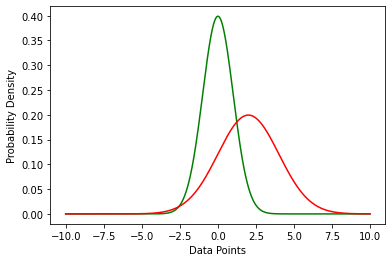

In [26]:
#ISMET OKAN CELIK 
#Campus-Wide ID: 10472265

import numpy as np
import matplotlib.pyplot as plt

x=np.arange(-10,10,0.01)

#Calculation of Likelihood Value
def gauss_dist(x,mu,sigma):
    pxw=1/(((2*np.pi)**0.5)*sigma)*np.exp(-0.5*((x-mu)/sigma)**2)
    return pxw

mu1=0
sigma1=1
pxw1=gauss_dist(x,mu1,sigma1)

mu2=2
sigma2=2
pxw2=gauss_dist(x,mu2,sigma2)

pxw1_x5=gauss_dist(5,mu1,sigma1)
pxw2_x5=gauss_dist(5,mu2,sigma2)

#Plotting Likelihood Function
plt.plot(x,pxw1,color='green')
plt.plot(x,pxw2,color='red')
plt.xlabel('Data Points')
plt.ylabel('Probability Density')

#Calculation of likelihood value for x=5
print('Values of Likelihood Functions=',{'p(x|w1)':pxw1_x5 , 'p(x|w2)':pxw2_x5})

Evidence Value for X=5 ==> 0.02590441116488719


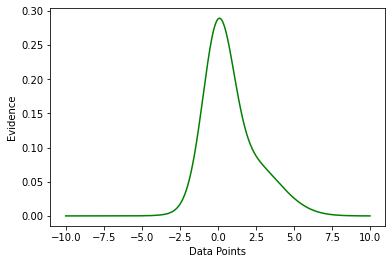

In [27]:
#Evidence Distribution
def evidence(pxw1,pxw2,pw1,pw2):
    res=[]
    for i,c in zip(pxw1,pxw2):
        res.append(i*pw1+c*pw2)
    return res

pw1, pw2=0.6 , 0.4  
px=evidence(pxw1,pxw2,pw1,pw2)

#Plotting Evidence Distribution
plt.plot(x,px,color='green')
plt.xlabel('Data Points')
plt.ylabel('Evidence')

#Calculation of Evidence Value for x=5
p=pxw1_x5*pw1+pxw2_x5*pw2
print('Evidence Value for X=5 ==>',p)

Posterior Probability value for X=5
-----------------------------------
p(w1|x)= 3.443551382668394e-05
p(w2|x) 0.9999655644861734


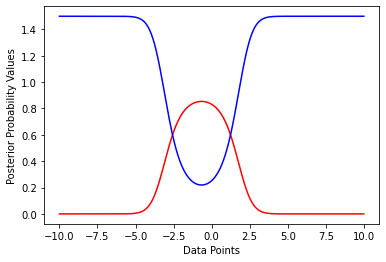

In [28]:
#Posterior Probability Function
post_pw1x=[]
post_pw2x=[]

for a,b in zip(pxw1,px):
    post_1=a*pw1/b
    post_pw1x.append(post_1)
    
for c,d in zip(pxw2,px):
    post_2=c*pw1/d
    post_pw2x.append(post_2)

#pw1x=pxw1*pw1/px
#pw2x=pxw2*pw2/px

plt.plot(x,post_pw1x,color='red')
plt.plot(x,post_pw2x,color='blue')
plt.xlabel('Data Points')
plt.ylabel('Posterior Probability Values')

#Posterior Probability Values for x=5
pw1x_x5=pxw1_x5*pw1/p
pw2x_x5=pxw2_x5*pw2/p

print('Posterior Probability value for X=5')
print('-----------------------------------')
print('p(w1|x)=',pw1x_x5)
print('p(w2|x)',pw2x_x5)


Likelihood Value for X=5 ==> 2.2957799781421097e-05


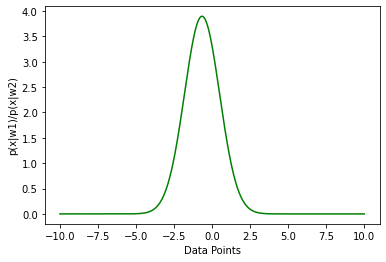

In [20]:
#Likelihood Ratio
likelihood_r=[]
for a,b in zip(pxw1,pxw2):
    L=a/b
    likelihood_r.append(L)
plt.plot(x,likelihood_r,color='Green')
plt.xlabel('Data Points')
plt.ylabel('p(x|w1)/p(x|w2)')

#Calculation of likelihood ratio for X=5
L_x5=pxw1_x5/pxw2_x5
print('Likelihood Value for X=5 ==>',L_x5)

In [21]:
#Likelihood ratio treshold for zero-one loss function
teta_lambda=pw2/pw1
print('Calculation of likelihood ratio threshold for zero-one loss function ==>',teta_lambda)

lambda12,lambda11, lambda21, lambda22 = 0,4,2,0

teta_lambda_general=(pw2/pw1)*((lambda12-lambda22)/(lambda21-lambda11))
print('Calculation of likelihood ratio threshold for general loss function ==>',teta_lambda_general)

Calculation of likelihood ratio threshold for zero-one loss function ==> 0.6666666666666667
Calculation of likelihood ratio threshold for general loss function ==> -0.0


In [22]:
#Calculation of likelihood ratio treshold for following risk matrix
lambda_r11,lambda_r12,lambda_r21,lambda_r22= 0,4,2,0
teta_r=(lambda_r12*pw2)/(lambda_r21*pw1)
print('Calculated Likelihood Ratio=',teta_r)

Calculated Likelihood Ratio= 1.3333333333333335


Risk Value for X=5 --> Region_1= 3.9998622579446934
Risk Value for X=5 --> Region_2= 6.887102765336788e-05


<ipython-input-23-299b6d836d42>:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(x,Ra1x_list,Color='Green')
<ipython-input-23-299b6d836d42>:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(x,Ra2x_list,Color='Red')


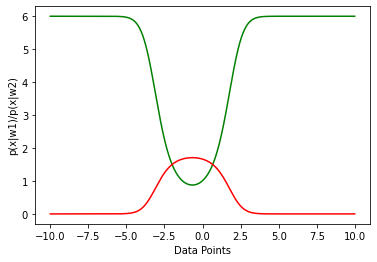

In [23]:
Ra1x_list=[]
Ra2x_list=[]
for a,b in zip(post_pw1x,post_pw2x):
    Ra1x=lambda_r11*a+lambda_r12*b
    Ra2x=lambda_r21*a+lambda_r22*b
    Ra1x_list.append(Ra1x)
    Ra2x_list.append(Ra2x)

plt.plot(x,Ra1x_list,Color='Green')
plt.plot(x,Ra2x_list,Color='Red')
plt.xlabel('Data Points')
plt.ylabel('p(x|w1)/p(x|w2)')

#Bayes Risk Value for X=5
Ra1x_x5=lambda_r11*pw1x_x5+lambda_r12*pw2x_x5
Ra2x_x5=lambda_r21*pw1x_x5+lambda_r22*pw2x_x5

print('Risk Value for X=5 --> Region_1=',Ra1x_x5)
print('Risk Value for X=5 --> Region_2=',Ra2x_x5)